# **Download the Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd/content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!unzip Flowers-Dataset.zip

# **Image Augmentation**

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)


In [11]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 4317 images belonging to 5 classes.


In [13]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 4317 images belonging to 5 classes.


In [14]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# **Create Model**

In [15]:
model=Sequential()

**Adding Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)**

Convolution Layer

In [16]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

MaxPooling Layer

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

**Flatten Layer**

In [18]:
model.add(Flatten())

Dense (Hidden Layer)

In [19]:
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=150,kernel_initializer="random_uniform",activation="relu"))


Output Layer

In [20]:
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 5)                 755       
                                                        

# **Compile The Model**


In [22]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

# **Fit The Model**

In [23]:
model.fit(x_train, epochs = 5, validation_data=x_test, steps_per_epoch=len(x_train), validation_steps=len(x_test))

Epoch 1/5
135/135 [==============================] - 66s 485ms/step - loss: 1.2883 - accuracy: 0.4193 - val_loss: 1.1435 - val_accuracy: 0.5156
Epoch 2/5
135/135 [==============================] - 65s 479ms/step - loss: 1.1360 - accuracy: 0.5230 - val_loss: 1.0847 - val_accuracy: 0.5319
Epoch 3/5
135/135 [==============================] - 66s 489ms/step - loss: 1.0377 - accuracy: 0.5819 - val_loss: 0.9807 - val_accuracy: 0.6037
Epoch 4/5
135/135 [==============================] - 65s 478ms/step - loss: 0.9706 - accuracy: 0.6187 - val_loss: 0.9275 - val_accuracy: 0.6264
Epoch 5/5
135/135 [==============================] - 67s 496ms/step - loss: 0.9400 - accuracy: 0.6315 - val_loss: 0.9675 - val_accuracy: 0.6143


# **Save The Model**

In [24]:
model.save("flower.h5")

# **Test The Model**

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [26]:
model = load_model('flower.h5')
img = image.load_img('/content/drive/MyDrive/flowers/daisy/14551098743_2842e7a004_n.jpg',target_size=(64,64))

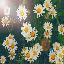

In [27]:
img

In [28]:
x=image.img_to_array(img)

In [29]:
x

array([[[235., 219., 219.],
        [235., 230., 226.],
        [236., 232., 229.],
        ...,
        [ 61.,  76.,  73.],
        [ 32.,  73.,  57.],
        [ 36.,  62.,  59.]],

       [[234., 229., 226.],
        [236., 234., 235.],
        [238., 238., 238.],
        ...,
        [ 38.,  72.,  58.],
        [ 39.,  76.,  42.],
        [ 45.,  61.,  61.]],

       [[234., 233., 231.],
        [237., 237., 237.],
        [238., 238., 238.],
        ...,
        [ 37.,  73.,  63.],
        [ 46.,  81.,  57.],
        [ 32.,  50.,  60.]],

       ...,

       [[ 80., 100.,  89.],
        [206., 185., 168.],
        [219., 127.,  14.],
        ...,
        [189., 185., 160.],
        [ 40.,  73.,  62.],
        [ 94., 135.,   3.]],

       [[136., 108., 107.],
        [194., 176., 174.],
        [161., 145.,  67.],
        ...,
        [213., 191., 170.],
        [211., 209., 196.],
        [121., 133.,  61.]],

       [[  4.,  59.,  54.],
        [ 21.,  63.,  62.],
        [135., 1

In [30]:
x.shape

(64, 64, 3)

In [31]:
x=np.expand_dims(x,axis=0)

In [32]:
y=np.argmax(model.predict(x),axis=0)

In [33]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [34]:
array=['daisy','dandelion','rose','sunflower']

In [43]:
array[y[0]]

'daisy'

In [48]:
img=image.load_img(r"/content/drive/MyDrive/flowers/sunflower/9479261399_cebfbff670_n.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
array=['daisy','dandelion','rose','sunflower']
array[y[0]]

'sunflower'

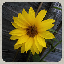

In [49]:
img

In [55]:
img=image.load_img(r"/content/drive/MyDrive/flowers/daisy/9094631844_1a6abca29e.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
array=['daisy','rose','dandelion','sunflower']
array[y[0]]

'daisy'

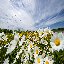

In [53]:
img